In [1]:
import kagglehub

# Fictional dataset on HR Employee attrition and performance from Kaggle
patelprashant_employee_attrition_path = kagglehub.dataset_download('patelprashant/employee-attrition')

print('Data source import complete.')

100%|██████████| 50.1k/50.1k [00:00<00:00, 10.1MB/s]

Extracting files...
Data source import complete.


In [2]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Education<br>
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction<br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement<br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction<br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating<br>
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction<br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance<br>
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [8]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

In [10]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


**Since, Over18, EmployeeCount and StandardHours have only one kind of value, I am removing both the columns**

In [15]:
df.drop(['Over18', 'StandardHours', 'EmployeeCount'], axis = 'columns', inplace = True)

In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


# Univariate Analysis

### For numerical values

In [17]:
fig = px.histogram(df, x="Age", nbins=35)
fig.show()

### For categorical data

In [18]:
fig = px.histogram(df, x="BusinessTravel", color = "BusinessTravel")
fig.show()

## Adding more details using Figure Factory and Graph Objects

### For Categorical Data

In [19]:
df['Education'].value_counts()

,count
Education,
3,572
4,398
2,282
1,170
5,48


In [20]:
education = {1 : 'Below College',
             2 : 'College',
            3 : 'Bachelor',
            4 : 'Master',
            5 : 'Doctor'}

In [21]:
Education = pd.DataFrame(df['Education'].value_counts())
Education = Education.reset_index()
Education.columns = ['Education', 'No. of employees']

In [22]:
Education['Education'] = Education['Education'].replace(education)

In [23]:
Education

,Education,No. of employees
0,Bachelor,572
1,Master,398
2,College,282
3,Below College,170
4,Doctor,48


In [24]:
fig = ff.create_table(Education)

fig.add_trace(go.Bar(x= list(Education.Education),
                     y=list(Education['No. of employees']),
                     xaxis='x2', yaxis='y2',
                    name='Count'))


fig.update_layout(
    title_text = 'Number of employees having respective education',
    height = 1000,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Count'}
)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 15

fig.show()

### For numerical data

In [25]:
fig = ff.create_distplot([df['Age']], group_labels =['age_density'], colors = ['#ff0000'])
fig.show()

# Bivariate Analysis

### Categorical v/s Numerical

In [26]:
fig = px.bar(df, x='MonthlyIncome', y='Department')
fig.show()

**If we directly create a plot between a categorical and numerical variable then it will just plot row by row data without considering any average value or any sequence**

In [27]:
avg_sal = pd.DataFrame(df.groupby('Department')['MonthlyIncome'].mean())
avg_sal = avg_sal.reset_index()
avg_sal.columns = ['Department', 'Avg. Salary']

In [28]:
fig = px.bar(avg_sal, x='Avg. Salary', y='Department', color = 'Department')
fig.show()

### Numerical v/s Numerical (Continuous data)

In [29]:
fig = px.scatter(df , x= 'Age', y='MonthlyIncome')
fig.show()

**We can clearly observe here that employees with lesser age have lesser income :(**

# Multivariate Analysis

**To analyse the relationship between 3 or more variables**

### Heatmap

In [33]:
fig = px.imshow(df.corr())
fig.show()

ValueError: could not convert string to float: 'Yes'

### Scatter Plot (With box and violin plot)

In [32]:
px.scatter(df , x= 'Age', y='MonthlyIncome', color = 'Attrition', marginal_x = 'box', marginal_y = 'violin')

**Click on any one of the attrition at the corner to remove it from the graph**

In [34]:
fig = px.bar(df, x="Department", y="MonthlyIncome",
             color='Attrition', barmode='group',
             height=400)
fig.show()

**Here also it is plotting the row by row data**

In [35]:
data = df.groupby(['Department', 'Attrition'])['MonthlyIncome'].mean().reset_index()

#### Grouped Bar charts

In [36]:
fig = px.bar(data, x="Department", y="MonthlyIncome",
             color='Attrition', barmode='group',
             height=400)
fig.show()

**Here, we are checking the average monthly income of different departments based on their attrition**

#### Stacked Bar Charts

In [37]:
fig = px.bar(data, x="Department", y="MonthlyIncome",
             color='Attrition', barmode='stack',
             height=400)
fig.show()

### Facet Col and row

**To divide rows and columns based on the categorical column**

In [38]:
data = df.groupby(['Department','Gender', 'BusinessTravel', 'Attrition'])['MonthlyIncome'].mean().reset_index()

In [39]:
px.bar(data, x = 'Department',
           y = 'MonthlyIncome',
           color = 'Attrition',
          barmode = 'group',
          facet_col = 'BusinessTravel',
          facet_row = 'Gender')

# Statistical Analysis

### Box Plot

In [40]:
px.box(df, x = 'EducationField', y = 'MonthlyIncome', color = 'Attrition')

### Violin Plot

In [41]:
px.violin(df, x = 'EducationField', y = 'MonthlyIncome', color = 'Attrition')

# WordCloud

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [44]:
fields = ['EducationField']
text = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', usecols=fields)

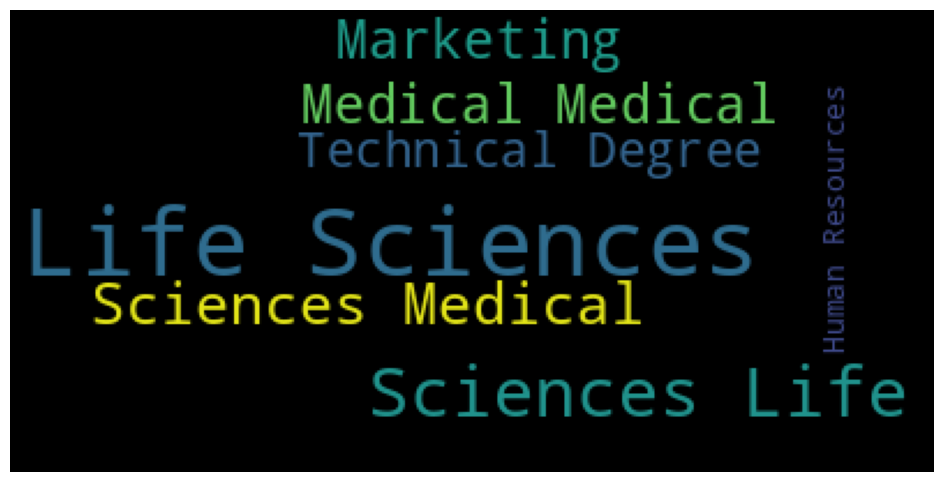

In [45]:
text3 = ' '.join(text['EducationField'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.figure(figsize = (16,6))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# Treemaps

In [46]:
px.treemap(df, path = ['Department','BusinessTravel','Gender'], values = 'MonthlyIncome')

### How to gain insights from this tree map?

**The department which earns highest income is R&D.**<br>
**In R&D, those who earn highest income travel_rarely**<br>
**In R&D, those who travel_rarely, Males earn more income**